In [26]:
def imposta_irpef_2021(imponibile):
    if imponibile <= 15000:
        return imponibile * 0.23
    elif imponibile <= 28000:
        return 3450 + (imponibile - 15000) * 0.27
    elif imponibile <= 55000:
        return 6960 + (imponibile - 28000) * 0.38
    elif imponibile <= 75000:
        return 17220 + (imponibile - 55000) * 0.41
    else:
        return 25420 + (imponibile - 75000) * 0.43

In [18]:
imposta_irpef_2021(30000)

7720.0

In [11]:
def imposta_irpef_2022(imponibile):
    if imponibile <= 15000:
        return imponibile * 0.23
    elif imponibile <= 28000:
        return 3450 + (imponibile - 15000) * 0.25
    elif imponibile <= 50000:
        return 6700 + (imponibile - 28000) * 0.35
    else:
        return 14400 + (imponibile - 50000) * 0.43

In [19]:
imposta_irpef_2022(30000)

7400.0

In [21]:
import pandas as pd

In [39]:
df = pd.DataFrame(
    {
        'reddito': list(range(1000, 100000, 1000))
    }, index = list(range(1000, 100000, 1000))
)
df

,reddito
1000,1000
2000,2000
3000,3000
4000,4000
5000,5000
...,...
95000,95000
96000,96000
97000,97000
98000,98000


In [40]:
df['imposta_irpef_2021'] = df['reddito'].apply(imposta_irpef_2021)
df['imposta_irpef_2022'] = df['reddito'].apply(imposta_irpef_2022)
df

,reddito,imposta_irpef_2021,imposta_irpef_2022
1000,1000,230.0,230.0
2000,2000,460.0,460.0
3000,3000,690.0,690.0
4000,4000,920.0,920.0
5000,5000,1150.0,1150.0
...,...,...,...
95000,95000,34020.0,33750.0
96000,96000,34450.0,34180.0
97000,97000,34880.0,34610.0
98000,98000,35310.0,35040.0


In [69]:
df['riduzione_imposta'] = df.apply(lambda row: row.imposta_irpef_2022 - row.imposta_irpef_2021, axis=1)
df

,reddito,imposta_irpef_2021,imposta_irpef_2022,aliquota_2021,aliquota_2022,riduzione_aliquota,riduzione_imposta
1000,1000,230.0,230.0,23.000000,23.000000,0.000000,0.0
2000,2000,460.0,460.0,23.000000,23.000000,0.000000,0.0
3000,3000,690.0,690.0,23.000000,23.000000,0.000000,0.0
4000,4000,920.0,920.0,23.000000,23.000000,0.000000,0.0
5000,5000,1150.0,1150.0,23.000000,23.000000,0.000000,0.0
...,...,...,...,...,...,...,...
95000,95000,34020.0,33750.0,35.810526,35.526316,-0.284211,-270.0
96000,96000,34450.0,34180.0,35.885417,35.604167,-0.281250,-270.0
97000,97000,34880.0,34610.0,35.958763,35.680412,-0.278351,-270.0
98000,98000,35310.0,35040.0,36.030612,35.755102,-0.275510,-270.0


In [61]:
df['aliquota_2021'] = df.apply(lambda row: 100 * row.imposta_irpef_2021 / row.reddito, axis=1)
df['aliquota_2022'] = df.apply(lambda row: 100 * row.imposta_irpef_2022 / row.reddito, axis=1)
df

,reddito,imposta_irpef_2021,imposta_irpef_2022,aliquota_2021,aliquota_2022,riduzione_aliquota
1000,1000,230.0,230.0,23.000000,23.000000,0.000000
2000,2000,460.0,460.0,23.000000,23.000000,0.000000
3000,3000,690.0,690.0,23.000000,23.000000,0.000000
4000,4000,920.0,920.0,23.000000,23.000000,0.000000
5000,5000,1150.0,1150.0,23.000000,23.000000,0.000000
...,...,...,...,...,...,...
95000,95000,34020.0,33750.0,35.810526,35.526316,-0.002842
96000,96000,34450.0,34180.0,35.885417,35.604167,-0.002812
97000,97000,34880.0,34610.0,35.958763,35.680412,-0.002784
98000,98000,35310.0,35040.0,36.030612,35.755102,-0.002755


In [62]:
df['riduzione_aliquota'] = df.apply(lambda row: row.aliquota_2022 - row.aliquota_2021, axis=1)
df

,reddito,imposta_irpef_2021,imposta_irpef_2022,aliquota_2021,aliquota_2022,riduzione_aliquota
1000,1000,230.0,230.0,23.000000,23.000000,0.000000
2000,2000,460.0,460.0,23.000000,23.000000,0.000000
3000,3000,690.0,690.0,23.000000,23.000000,0.000000
4000,4000,920.0,920.0,23.000000,23.000000,0.000000
5000,5000,1150.0,1150.0,23.000000,23.000000,0.000000
...,...,...,...,...,...,...
95000,95000,34020.0,33750.0,35.810526,35.526316,-0.284211
96000,96000,34450.0,34180.0,35.885417,35.604167,-0.281250
97000,97000,34880.0,34610.0,35.958763,35.680412,-0.278351
98000,98000,35310.0,35040.0,36.030612,35.755102,-0.275510


Text(0, 0.5, '% aliquota')

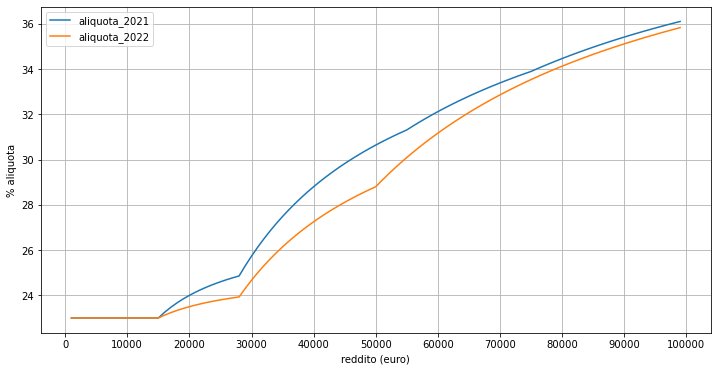

In [65]:
ax = df[['aliquota_2021', 'aliquota_2022']].plot(
    figsize=(12,6),
    xticks=range(0, 101000, 10000),
    grid=True
)
ax.set_xlabel("reddito (euro)")
ax.set_ylabel("% aliquota")

Text(0, 0.5, 'differenza di aliquota (punti percentuali)')

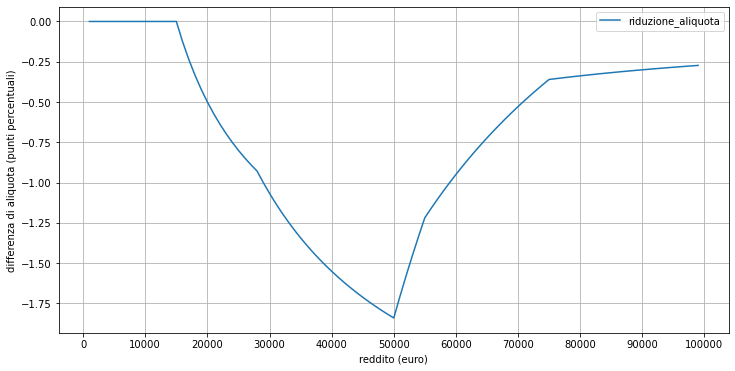

In [68]:
ax = df[['riduzione_aliquota']].plot.line(
    figsize=(12,6),
    xticks=range(0, 101000, 10000),
    grid=True
)
ax.set_xlabel("reddito (euro)")
ax.set_ylabel("differenza di aliquota (punti percentuali)")

Text(0, 0.5, 'differenza di imposta (euro)')

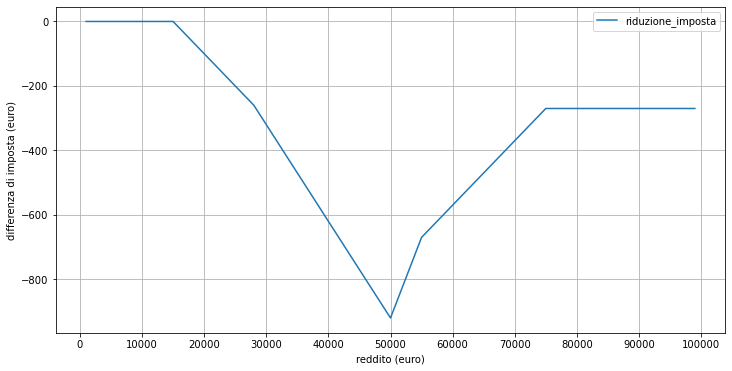

In [70]:
ax = df[['riduzione_imposta']].plot.line(
    figsize=(12,6),
    xticks=range(0, 101000, 10000),
    grid=True
)
ax.set_xlabel("reddito (euro)")
ax.set_ylabel("differenza di imposta (euro)")

Text(0, 0.5, 'differenza di imposta (euro)')

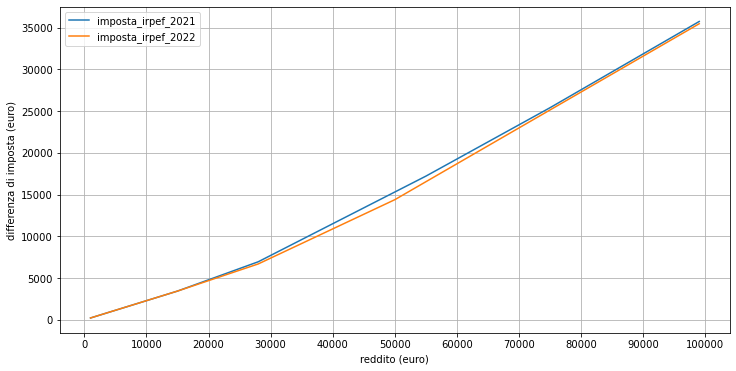

In [72]:
ax = df[['imposta_irpef_2021', 'imposta_irpef_2022']].plot.line(
    figsize=(12,6),
    xticks=range(0, 101000, 10000),
    grid=True
)
ax.set_xlabel("reddito (euro)")
ax.set_ylabel("differenza di imposta (euro)")